# Import libraries

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import rc
import matplotlib.transforms as transforms
from sklearn.decomposition import PCA
from matplotlib.patches import Patch
import config

# Set constants

In [7]:
# set colors
healthy_color = "steelblue"
nonhealthy_color = 'orange'

# set figure details
figsize = (10, 10)
dpi = 200

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

filename = "PCA.svg"

# Import data

In [8]:
X = pd.read_csv(os.path.join(config.CLEAN_DIR, "taxonomic_features.csv"), index_col=[0, 1])
y = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata.csv"), index_col=[0, 1]).iloc[:, [0]]
display(X.head())
display(y.head())

k__Archaea  k__Archaea|p__Euryarchaeota  \
Study_ID Sample Accession                                            
GMHI-10  SAMN03283239        0.000000                     0.000000   
         SAMN03283266        0.000000                     0.000000   
         SAMN03283281        0.009764                     0.009764   
         SAMN03283294        0.000000                     0.000000   
         SAMN03283288        0.011865                     0.011865   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria  \
Study_ID Sample Accession                                                   
GMHI-10  SAMN03283239                                            0.000000   
         SAMN03283266                                            0.000000   
         SAMN03283281                                            0.009764   
         SAMN03283294                                            0.000000   
         SAMN03283288                                            0.011865   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales  \
Study_ID Sample Accession                                                                         
GMHI-10  SAMN03283239                                               0.000000                      
         SAMN03283266                                               0.000000                      
         SAMN03283281                                               0.009764                      
         SAMN03283294                                               0.000000                      
         SAMN03283288                                               0.011865                      

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae  \
Study_ID Sample Accession                                                                                                
GMHI-10  SAMN03283239                                               0.000000                                             
         SAMN03283266                                               0.000000                                             
         SAMN03283281                                               0.009764                                             
         SAMN03283294                                               0.000000                                             
         SAMN03283288                                               0.011865                                             

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter  \
Study_ID Sample Accession                                                                                                                      
GMHI-10  SAMN03283239                                               0.000000                                                                   
         SAMN03283266                                               0.000000                                                                   
         SAMN03283281                                               0.009764                                                                   
         SAMN03283294                                               0.000000                                                                   
         SAMN03283288                                               0.011865                                                                   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii  \
Study_ID Sample Accession                                                                                                                                                    
GMHI-10  SAMN03283239                                               0.000000              

PHENOTYPE:Healthy_Nonhealthy
Study_ID Sample Accession                              
GMHI-10  SAMN03283239                              True
         SAMN03283266                              True
         SAMN03283281                              True
         SAMN03283294                              True
         SAMN03283288                              True

In [10]:
X.to_csv(os.path.join(config.FIG_DATA_DIR, "1c_relative_abundance.csv"))

In [11]:
y.to_csv(os.path.join(config.FIG_DATA_DIR, "1c_health_status.csv"))

# Dimensionality reduction

In [4]:
pca = PCA(random_state=42, n_components=2)
pca.fit(X > config.PRESENCE_CUTOFF)
PC1_variance, PC2_variance = pca.explained_variance_ratio_[:2] * 100
embedding = pca.transform(X > config.PRESENCE_CUTOFF)
embedding

array([[ 1.69910132,  5.10700429],
       [ 0.29747153, -1.26331052],
       [-0.14752581,  5.75057233],
       ...,
       [-1.1986457 , -0.80476489],
       [-1.10964835,  0.58300576],
       [ 1.11515779,  1.61157009]])

In [5]:
loading = pd.DataFrame(pca.components_.T, index=X.columns, columns=["PC1", "PC2"])
loading["Squared Dist"] = (loading ** 2).sum(axis=1)
loading = loading.sort_values("Squared Dist", ascending=False)
loading

,PC1,PC2,Squared Dist
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Lachnoclostridium,0.063355,-0.148820,0.026161
k__Bacteria|p__Actinobacteria|c__Coriobacteriia|o__Eggerthellales|f__Eggerthellaceae|g__Eggerthella,0.061529,-0.138191,0.022882
k__Bacteria|p__Actinobacteria|c__Coriobacteriia|o__Eggerthellales|f__Eggerthellaceae|g__Eggerthella|s__Eggerthella_lenta,0.061470,-0.138174,0.022871
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Lachnoclostridium|s__Clostridium_bolteae,0.079224,-0.127121,0.022436
k__Bacteria|p__Actinobacteria|c__Coriobacteriia|o__Eggerthellales|f__Eggerthellaceae|g__Gordonibacter,-0.004061,-0.141167,0.019945
...,...,...,...
k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Alteromonadales|f__Alteromonadaceae|g__Marinobacter|s__Marinobacter_salarius,0.000000,-0.000000,0.000000
k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Aerococcaceae|g__Facklamia|s__Facklamia_ignava,0.000000,-0.000000,0.000000
k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Caudovirales|f__Myoviridae|g__Silviavirus,0.000000,-0.000000,0.000000
k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Caudovirales|f__Myoviridae|g__Silviavirus|s__Staphylococcus_virus_SA11,0.000000,-0.000000,0.000000


# Plot!

In [6]:
# https://matplotlib.org/stable/gallery/statistics/confidence_ellipse.html
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

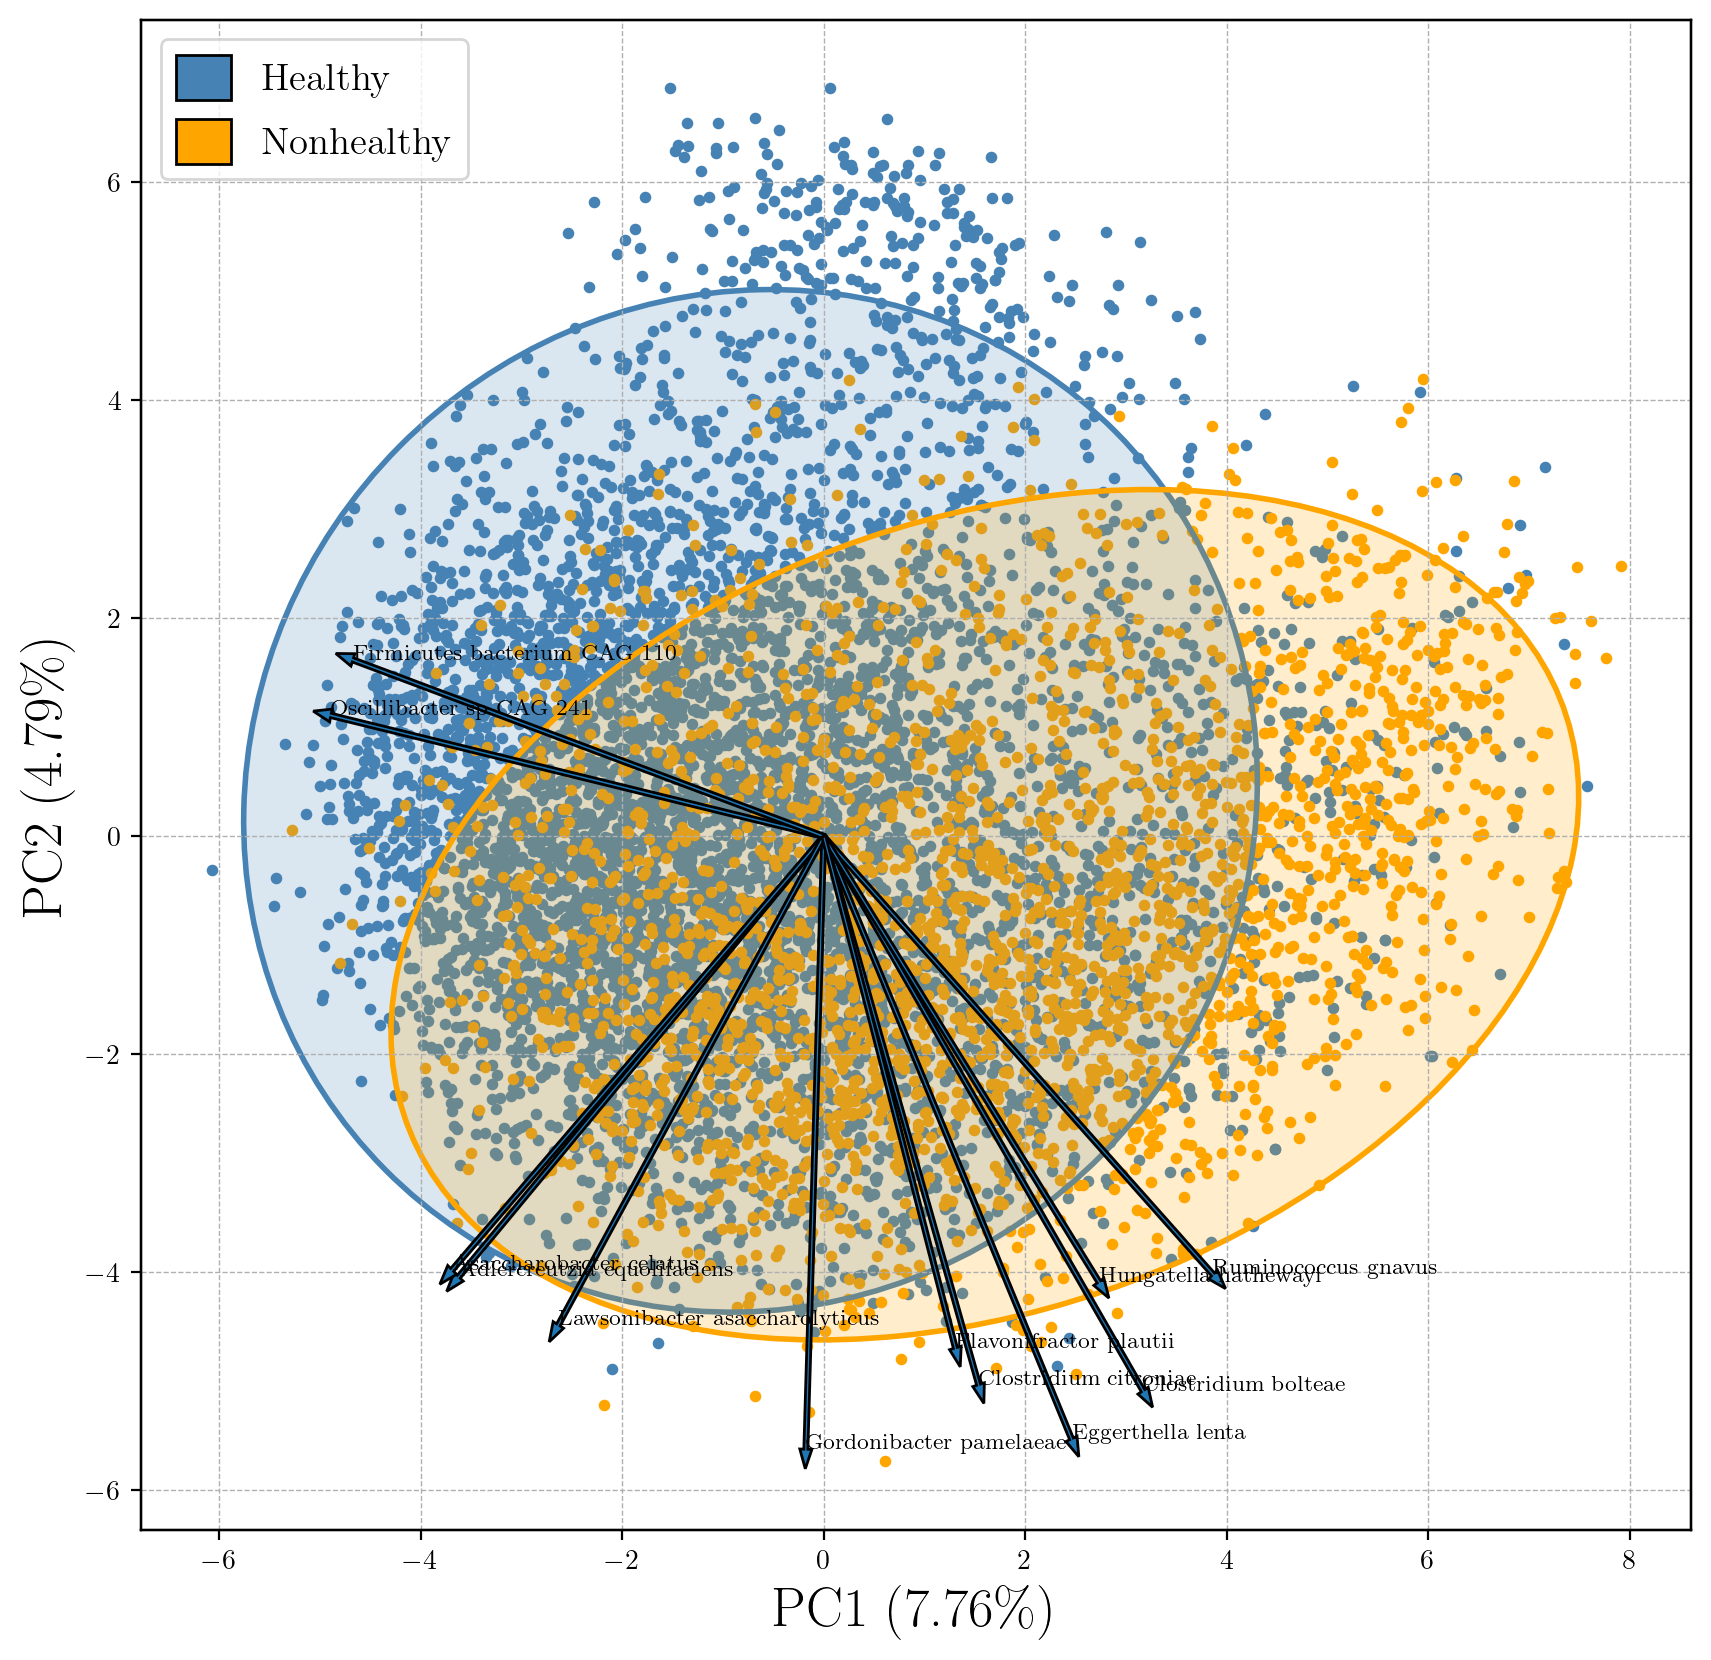

In [7]:
plt.figure(figsize=(10, 10), dpi=200)

ax = plt.gca()

PC1_healthy, PC2_healthy = embedding[y.values.flatten(), 0], embedding[y.values.flatten(), 1]

PC1_nonhealthy, PC2_nonhealthy = embedding[~y.values.flatten(), 0], embedding[~y.values.flatten(), 1]

dot_alpha = 1
dot_size = 10
plt.scatter(PC1_healthy, PC2_healthy, alpha=dot_alpha, s=dot_size, label="Healthy", color=healthy_color)
plt.scatter(PC1_nonhealthy, PC2_nonhealthy, alpha=dot_alpha, s=dot_size, label="Nonhealthy", color=nonhealthy_color)

# 2.25 standard deviations is about 95% confidence in 2D
n_std = 2.25
confidence_ellipse(PC1_healthy, PC2_healthy, plt.gca(), n_std=n_std,
                   alpha=1, edgecolor=healthy_color, lw=2)
confidence_ellipse(PC1_healthy, PC2_healthy, plt.gca(), n_std=n_std,
                   alpha=0.2, facecolor=healthy_color)

confidence_ellipse(PC1_nonhealthy, PC2_nonhealthy, plt.gca(), n_std=n_std,
                   alpha=1, edgecolor=nonhealthy_color, lw=2)
confidence_ellipse(PC1_nonhealthy, PC2_nonhealthy, plt.gca(), n_std=n_std,
                   alpha=0.2, facecolor=nonhealthy_color)

plt.xlabel(f"PC1 ({'{:.2f}'.format(PC1_variance)}\%)", fontsize=20)
plt.ylabel(f"PC2 ({'{:.2f}'.format(PC2_variance)}\%)", fontsize=20)

handles = [
    Patch(facecolor=healthy_color, edgecolor="k", label="Healthy"),
    Patch(facecolor=nonhealthy_color, edgecolor="k", label="Nonhealthy"),
]

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend(handles=handles, prop={'size': 14}, loc=2, handlelength=1.4, handleheight=1.4)

# plot loading factors
num_features = 20

twinx = ax.twinx()

ax_new = twinx.twiny()

for i in range(num_features):
    if "|s_" not in loading.index[i]: continue
    pc1, pc2 = loading["PC1"][i], loading["PC2"][i]
    ax_new.arrow(0, 0, pc1, pc2)
    ax_new.text(pc1, pc2, loading.index[i].split("|s_")[-1].replace("_", " "), fontsize=8)

# ax_new.scatter(loading["PC1"][:num_features], loading["PC2"][:num_features], s=40, color="red")

scale = 0.025

ax_new.set_xlim(x_min * scale, x_max * scale)
ax_new.set_ylim(y_min * scale, y_max * scale)

ax_new.tick_params(
    axis='x',
    which='both',
    top=False,
    labeltop=False,
)

twinx.tick_params(
    axis='y',
    which='both',
    right=False,
    labelright=False,
)

plt.savefig(os.path.join(config.FIGURE_DIR, filename))

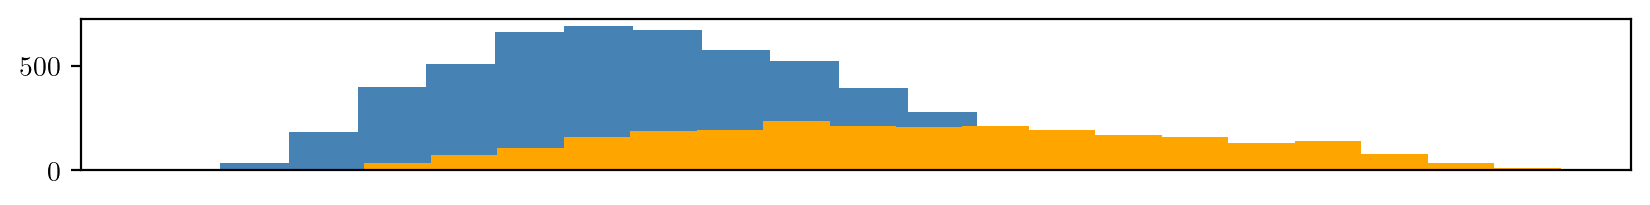

In [8]:
plt.figure(figsize=(10, 1), dpi=200)

ax = plt.gca()

plt.hist(embedding[y.values.flatten(), 0], bins=20, color=healthy_color)
plt.hist(embedding[~y.values.flatten(), 0], bins=20, color=nonhealthy_color)

ax.tick_params(
    axis='x',
    which='both',
    bottom=False,
    labelbottom=False,
)

plt.show()

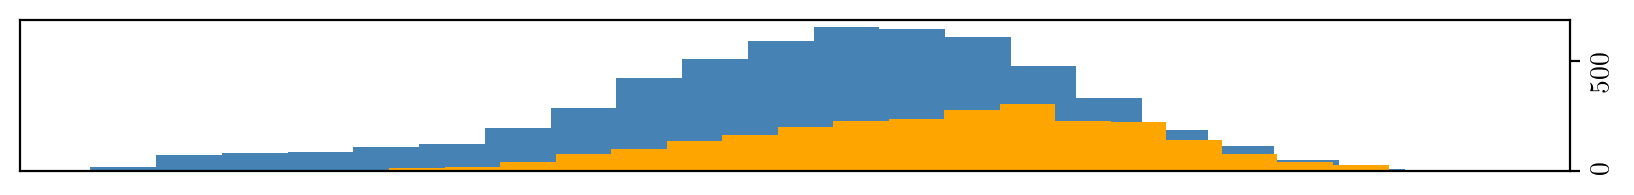

In [9]:
plt.figure(figsize=(10, 1), dpi=200)

plt.hist(embedding[y.values.flatten(), 1], bins=20, color=healthy_color)
plt.hist(embedding[~y.values.flatten(), 1], bins=20, color=nonhealthy_color)

ax = plt.gca()
ax.yaxis.tick_right()

ax.tick_params(
    axis='x',
    which='both',
    bottom=False,
    labelbottom=False,
)

ax.tick_params(
    axis='y',
    rotation=90
)

ax.invert_xaxis()

plt.show()